# Importing Libraries

In [2]:
import os
from gensim.models import Word2Vec
import math
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
import tensorflow as tf
from sklearn.metrics import roc_curve, roc_auc_score, auc,accuracy_score,classification_report,confusion_matrix
from sklearn.svm import SVC
import seaborn as sns

# Reading all the files from Spam Detection Folder 

In [3]:
for root, dirs, files in os.walk(r"SpamDetection", topdown=True):
    print(root)
    print(dirs)
    print(files)
    print('*'*50)

SpamDetection
['ham', 'spam']
[]
**************************************************
SpamDetection\ham
[]
['00001.1a31cc283af0060967a233d26548a6ce', '00001.7c53336b37003a9286aba55d2945844c', '00001.7c7d6921e671bbe18ebb5f893cd9bb35', '00002.5a587ae61666c5aa097c8e866aedcc59', '00002.9c4069e25e1ef370c078db7ee85ff9ac', '00002.ca96f74042d05c1a1d29ca30467cfcd5', '00003.19be8acd739ad589cd00d8425bac7115', '00003.268fd170a3fc73bee2739d8204856a53', '00003.860e3c3cee1b42ead714c5c874fe25f7', '00004.68819fc91d34c82433074d7bd3127dcc', '00004.864220c5b6930b209cc287c361c99af1', '00004.b2ed6c3c62bbdfab7683d60e214d1445', '00005.07b9d4aa9e6c596440295a5170111392', '00005.34bcaad58ad5f598f5d6af8cfa0c0465', '00005.bf27cdeaf0b8c4647ecd61b1d09da613', '00006.253ea2f9a9cc36fa0b1129b04b806608', '00006.3409dec8ca4fcf2d6e0582554473b5c9', '00006.654c4ec7c059531accf388a807064363', '00007.2e086b13730b68a21ee715db145522b9', '00007.37a8af848caae585af4fe35779656d55', '00007.d24e99a602ee7fb442714c0d448cd08e', '00008.58915

In [4]:
def Spam_Ham_Data(folder):
    from_list = []
    subject_list = []
    content_list = []
    
    SH_Data = {}
    df = pd.DataFrame()
    folder_name = r'SpamDetection/' + folder
    files = os.listdir(folder_name)
#     print(files)
    for file in files:
#         print('file_name :', file)
        with open(folder_name+'/'+file,'r', encoding = 'latin1') as f:
            message_content = ''
            content = f.read()
#             print(content)
            lines = content.split('\n')

            for line in lines:
                if ':' in line:
                    key, value = line.split(':', 1)
                    
                    SH_Data[key.strip()] = value.strip()
                else:
#                         message_content.append(line)
                    message_content += line.strip()+ "\n"

#             print(message_content)
            pattern = r'^.*?(\n\s*\n|$)'
            replacement = ''
            result = re.sub(pattern, replacement, message_content, flags=re.DOTALL)

            SH_Data['message_content'] = result.strip()
            
            from_list.append(SH_Data['From'])
            subject_list.append(SH_Data['Subject'])
            content_list.append(SH_Data['message_content'])
        
    df["From"] = from_list
    df["Subject"] = subject_list
    df["message_content"] = content_list
    df["class"] = folder

    return df

# Concatinating Both Ham and Spam into one data frame

In [5]:
SH_df = pd.concat([Spam_Ham_Data('spam'),Spam_Ham_Data('ham')],axis=0)
SH_df

,From,Subject,message_content,class
0,"""Start Now"" <startnow2002@hotmail.com>",[ILUG] STOP THE MLM INSANITY,Greetings!\n\nYou are receiving this letter be...,spam
1,12a1mailbot1@web.de,Life Insurance - Why Pay More?,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",spam
2,lmrn@mailexcite.com,"Real Protection, Stun Guns! Free Shipping! Ti...","<html>\n<body>\n<center>\n<h3>\n<font color=""b...",spam
3,"""Slim Down"" <taylor@s3.serveimage.com>",[ILUG] Guaranteed to lose 10-12 lbs in 30 days...,1) Fight The Risk of Cancer!\n\n2) Slim Down -...,spam
4,"""Slim Down"" <sabrina@mx3.1premio.com>",Guaranteed to lose 10-12 lbs in 30 days ...,1) Fight The Risk of Cancer!\n\n2) Slim Down -...,spam
...,...,...,...,...
6696,newscientist <rssfeeds@example.com>,Gene technique reveals human evolution,A method that could allow scientists to probe ...,ham
6697,guardian <rssfeeds@example.com>,Go-ahead for new-style hospitals,,ham
6698,newscientist <rssfeeds@example.com>,Malicious code hidden in email software,The new software was switched for dummy code c...,ham
6699,guardian <rssfeeds@example.com>,'Flexible' retirement gains ground,,ham


# Removing the HTMl tags from the combined data frame

In [6]:
def remove_html_tags(text):
    cleaned_text = re.sub(r'<.*?>', '', text)
    return cleaned_text

# Apply the function to the 'html_content' column
SH_df["message_content"] = SH_df["message_content"].apply(remove_html_tags)

In [7]:
SH_df

,From,Subject,message_content,class
0,"""Start Now"" <startnow2002@hotmail.com>",[ILUG] STOP THE MLM INSANITY,Greetings!\n\nYou are receiving this letter be...,spam
1,12a1mailbot1@web.de,Life Insurance - Why Pay More?,"\n\n<META content=3D""text/html; charset=3Dwind...",spam
2,lmrn@mailexcite.com,"Real Protection, Stun Guns! Free Shipping! Ti...",\n\n\n\n\n\nThe Need For Safety Is Real In 200...,spam
3,"""Slim Down"" <taylor@s3.serveimage.com>",[ILUG] Guaranteed to lose 10-12 lbs in 30 days...,1) Fight The Risk of Cancer!\n\n2) Slim Down -...,spam
4,"""Slim Down"" <sabrina@mx3.1premio.com>",Guaranteed to lose 10-12 lbs in 30 days ...,1) Fight The Risk of Cancer!\n\n2) Slim Down -...,spam
...,...,...,...,...
6696,newscientist <rssfeeds@example.com>,Gene technique reveals human evolution,A method that could allow scientists to probe ...,ham
6697,guardian <rssfeeds@example.com>,Go-ahead for new-style hospitals,,ham
6698,newscientist <rssfeeds@example.com>,Malicious code hidden in email software,The new software was switched for dummy code c...,ham
6699,guardian <rssfeeds@example.com>,'Flexible' retirement gains ground,,ham


# Checking for NULL values

In [8]:
SH_df.isnull().sum()

From               0
Subject            0
message_content    0
class              0
dtype: int64

# Removing \n from the data

In [9]:
SH_df["message_content"] = SH_df["message_content"].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)
SH_df

,From,Subject,message_content,class
0,"""Start Now"" <startnow2002@hotmail.com>",[ILUG] STOP THE MLM INSANITY,Greetings\n\nYou are receiving this letter bec...,spam
1,12a1mailbot1@web.de,Life Insurance - Why Pay More?,\n\nMETA content3Dtexthtml charset3Dwindows125...,spam
2,lmrn@mailexcite.com,"Real Protection, Stun Guns! Free Shipping! Ti...",\n\n\n\n\n\nThe Need For Safety Is Real In 200...,spam
3,"""Slim Down"" <taylor@s3.serveimage.com>",[ILUG] Guaranteed to lose 10-12 lbs in 30 days...,1 Fight The Risk of Cancer\n\n2 Slim Down Gua...,spam
4,"""Slim Down"" <sabrina@mx3.1premio.com>",Guaranteed to lose 10-12 lbs in 30 days ...,1 Fight The Risk of Cancer\n\n2 Slim Down Gua...,spam
...,...,...,...,...
6696,newscientist <rssfeeds@example.com>,Gene technique reveals human evolution,A method that could allow scientists to probe ...,ham
6697,guardian <rssfeeds@example.com>,Go-ahead for new-style hospitals,,ham
6698,newscientist <rssfeeds@example.com>,Malicious code hidden in email software,The new software was switched for dummy code c...,ham
6699,guardian <rssfeeds@example.com>,'Flexible' retirement gains ground,,ham


In [10]:
SH_df["message_content"] = SH_df["message_content"].str.replace(r'\n+', '', regex=True)

# Class Distribution graph which depicts the imbalance in the data 

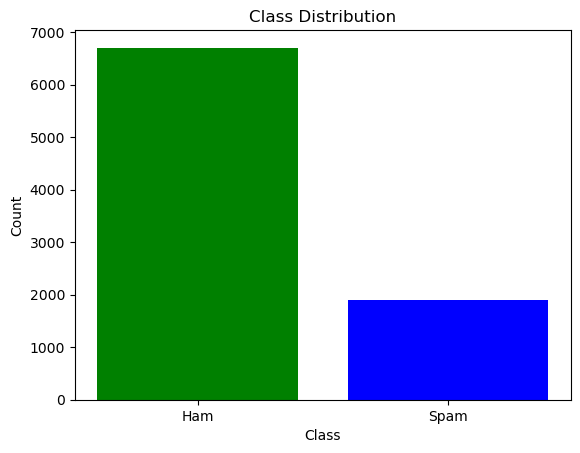

In [11]:
plt.bar(x = ["Ham","Spam"],height = SH_df["class"].value_counts(),color = ["green","blue"])
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution");

In [12]:
SH_df["class"].value_counts()

ham     6701
spam    1896
Name: class, dtype: int64

# Applying the random sampling to balance the data set to get accurate predictions

In [14]:
Ham_Sapled_Data = SH_df[SH_df["class"] == "ham"].sample(n =math.floor(len(SH_df[SH_df["class"] == "ham"])*(0.4)))

In [15]:
SH_df_Sampled = pd.concat([Ham_Sapled_Data,SH_df[SH_df["class"] == "spam"]])
SH_df_Sampled

,From,Subject,message_content,class
6457,boingboing <rssfeeds@example.com>,NYT discovers Linux in late 2002,NYT oped piece about this newfangled OS called...,ham
415,kevin lyda <kevin+dated+1028341549.b9da18@ie.s...,[ILUG] web amusements...,ok so i was also learning about css this weeke...,ham
4603,Lance <lance_tt@bellsouth.net>,Re: Fw: Re: When are we going to get. [making ...,Thanks for this information I gave Alsa a try...,ham
1210,CDale <cdale@techmonkeys.net>,Re[2]: Selling Wedded Bliss (was Re: Ouch...),If guys still have silly antequated ideas ab...,ham
166,Kae Verens <kverens@contactjuggling.org>,Re: [ILUG-Social] Doom for Linux,hi all Im looking to get my hands on either D...,ham
...,...,...,...,...
1891,Professional_Career_Development_Institute@Frug...,Busy? Home Study Makes Sense!,Want To Be Your Own Boss nbsp Train Now With S...,spam
1892,"""IQ - TBA"" <tba@insiq.us>",Preferred Non-Smoker Rates for Smokers,This is a multipart message in MIME formatNext...,spam
1893,Mike <raye@yahoo.lv>,"How to get 10,000 FREE hits per day to any web...",Dear SubscriberIf I could show you a way to ge...,spam
1894,"""Mr. Clean"" <cweqx@dialix.oz.au>",Cannabis Difference,MidSummer Customer Appreciation SALETo express...,spam


# After Balancing the data is segregated quite similar between Spam and Ham as compared to previous graphical representation

After sampling we observe the data has become balanced as compared to the actual data

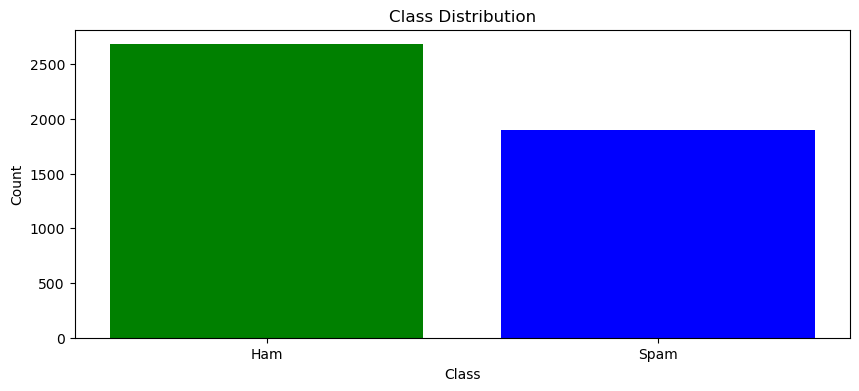

In [16]:
plt.figure(figsize = (10,4))
plt.bar(x = ["Ham","Spam"],height = SH_df_Sampled["class"].value_counts(),color = ["green","blue"])
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution");

In [17]:
#Copying the data SH_df_Sampled
SH_df_Sampled_Token = SH_df_Sampled.copy()

# Tokeniztion of the data

In [18]:
#Creating a function to tokenize the data 
def token_data(feature):
    token_feature = word_tokenize(feature)
    stop_words = set(stopwords.words('english'))
    token_data = [token for token in token_feature if token.lower() not in stop_words]
    return token_feature

In [19]:
SH_df_Sampled_Token["From"] = SH_df_Sampled_Token["From"].apply(token_data)
SH_df_Sampled_Token["Subject"] = SH_df_Sampled_Token["Subject"].apply(token_data)

In [20]:
SH_df_Sampled_Token["message_content"] = SH_df_Sampled_Token["message_content"].astype(str)

In [21]:
SH_df_Sampled_Token["message_content"] = SH_df_Sampled_Token["message_content"].apply(token_data)

In [22]:
SH_df_Sampled_Token['class'] = np.where(SH_df_Sampled_Token['class'] == 'spam', 0, 1)

In [23]:
X = SH_df_Sampled_Token.drop("class",axis =1)
y = SH_df_Sampled_Token["class"]

# Creating function to create multiple combinations for increasing the performance of the model. Tunning the model 

In [25]:
def WordToVec(vector_size,window,min_count,kernel):
# Combine all tokenized text into one list for training Word2Vec
    all_tokens = SH_df_Sampled_Token['From'] + SH_df_Sampled_Token['Subject'] + SH_df_Sampled_Token['message_content']

    # Train a Word2Vec model on your tokenized text
    model_w2v = Word2Vec(all_tokens, vector_size=vector_size, window=window, min_count=min_count, sg=0)

    # Save the Word2Vec model for future use if needed
    model_w2v.save("word2vec.model")
    
    X = []
    for tokens in all_tokens:
        # Calculate the document-level representation (e.g., averaging word vectors)
        doc_vector = np.mean([model_w2v.wv[token] for token in tokens if token in model_w2v.wv], axis=0)
        X.append(doc_vector)
        
    # 'y' is a list of labels (0 or 1 for binary classification)
    y = SH_df_Sampled_Token["class"]

    # Step 4: Split the Data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

    # Step 5: Train an SVM Model
    svm_model = SVC(kernel=kernel, C=1.0)
    svm_model.fit(X_train, y_train)

    # Step 6: Evaluate the Model
    y_pred = svm_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    Confusion_MatrixForTokenizatio = confusion_matrix(y_test,y_pred)
    y_prob = svm_model.decision_function(X_test)

    # Step 7: Calculate ROC curve and AUC and Confusion Matrix
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Step 8: Plot ROC curve
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title("ROC Curve")
    plt.legend(loc='lower right')
    plt.show()
    # Print or analyze the results as needed
    print("Accuracy_with_vector_size_{}_window_{}_min_count_{}_kernel_{}:".format(vector_size,window,min_count,kernel), accuracy)
    print("Classification Report_with_vector_size_{}_window_{}_min_count_{}_kernel_{}:\n".format(vector_size,window,min_count,kernel), report)
    
    labelsForCM = ["True Neg","False Pos","False Neg","True Pos"]
    names_percentages = ["{0:.2%}".format(value_data) for value_data in
    Confusion_MatrixForTokenizatio.flatten()/np.sum(Confusion_MatrixForTokenizatio)]
    labels = [f"{v1}\n{v3}" for v1, v3 in zip(labelsForCM,names_percentages)]

    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(Confusion_MatrixForTokenizatio,annot =labels ,fmt="", cmap='Greens')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Tunning-1

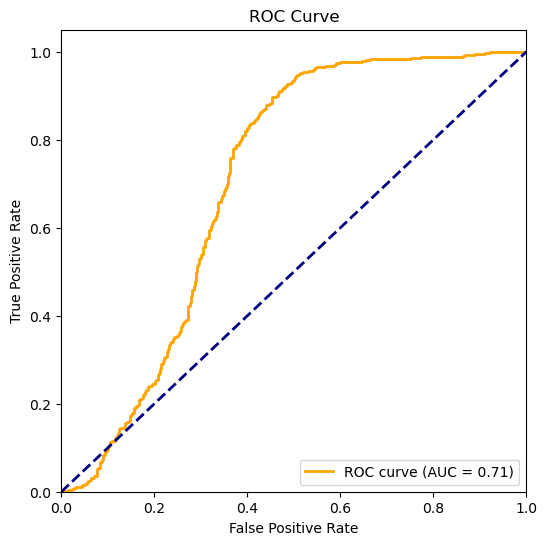

Accuracy_with_vector_size_1000_window_10_min_count_2_kernel_sigmoid: 0.7215980024968789
Classification Report_with_vector_size_1000_window_10_min_count_2_kernel_sigmoid:
               precision    recall  f1-score   support

           0       0.64      0.63      0.64       619
           1       0.77      0.78      0.77       983

    accuracy                           0.72      1602
   macro avg       0.71      0.70      0.71      1602
weighted avg       0.72      0.72      0.72      1602



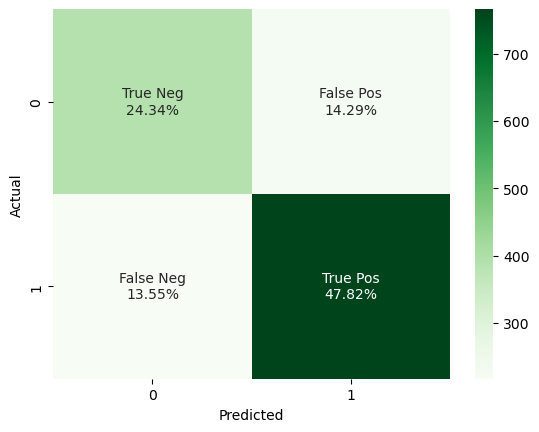

In [26]:
WordToVec(vector_size =1000,window=10,min_count=2,kernel= "sigmoid")

# Tunning-2

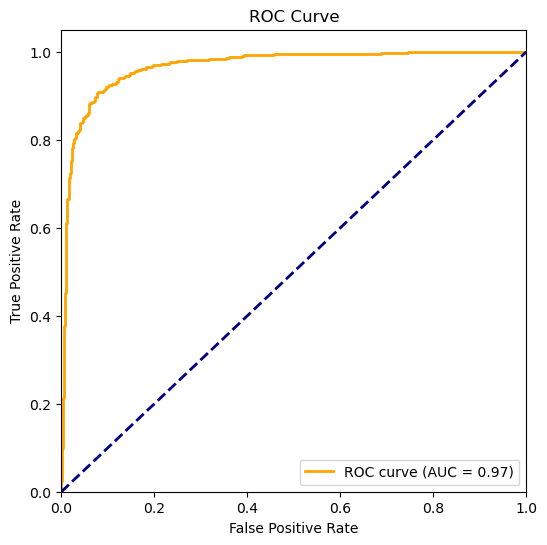

Accuracy_with_vector_size_100_window_5_min_count_1_kernel_linear: 0.9144818976279651
Classification Report_with_vector_size_100_window_5_min_count_1_kernel_linear:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       619
           1       0.92      0.94      0.93       983

    accuracy                           0.91      1602
   macro avg       0.91      0.91      0.91      1602
weighted avg       0.91      0.91      0.91      1602



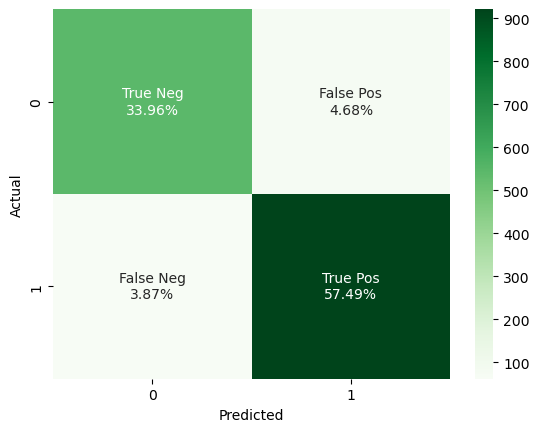

In [27]:
WordToVec(vector_size =100,window=5,min_count=1,kernel= "linear")

# Tunning-3

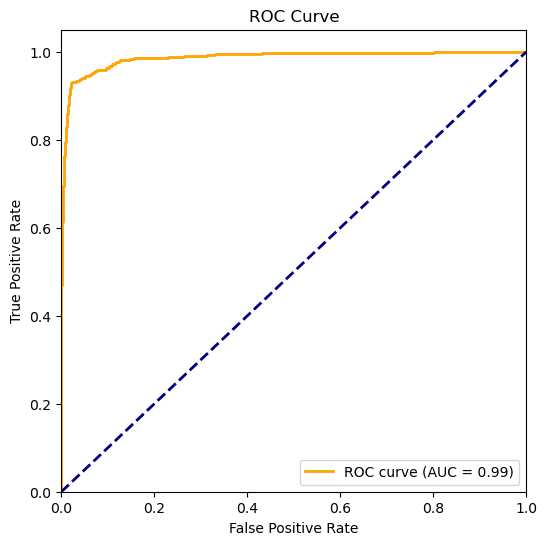

Accuracy_with_vector_size_1000_window_1000_min_count_2_kernel_linear: 0.9450686641697877
Classification Report_with_vector_size_1000_window_1000_min_count_2_kernel_linear:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       619
           1       0.95      0.96      0.96       983

    accuracy                           0.95      1602
   macro avg       0.94      0.94      0.94      1602
weighted avg       0.95      0.95      0.95      1602



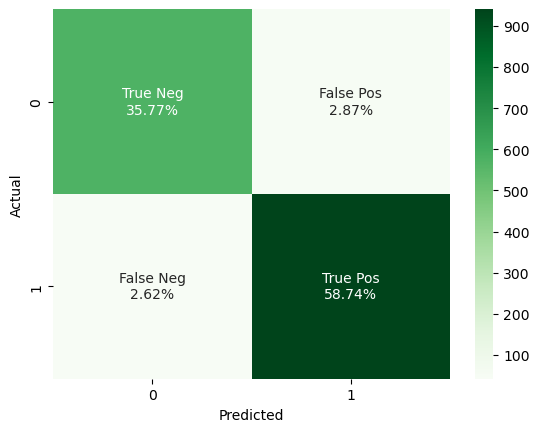

In [28]:
WordToVec(vector_size =1000,window=1000,min_count=2,kernel= "linear")       

# Tunning-4

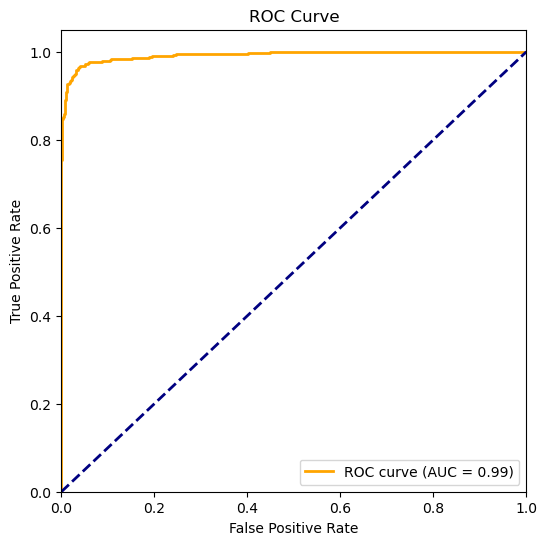

Accuracy_with_vector_size_1000_window_100_min_count_2_kernel_rbf: 0.9619225967540574
Classification Report_with_vector_size_1000_window_100_min_count_2_kernel_rbf:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       619
           1       0.98      0.96      0.97       983

    accuracy                           0.96      1602
   macro avg       0.96      0.96      0.96      1602
weighted avg       0.96      0.96      0.96      1602



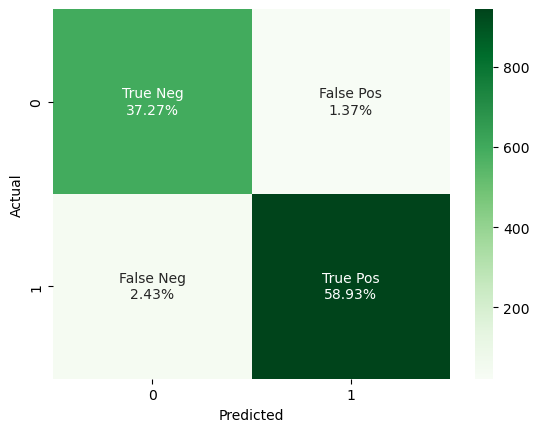

In [29]:
WordToVec(vector_size =1000,window=100,min_count=2,kernel= "rbf")

# Tunning-5

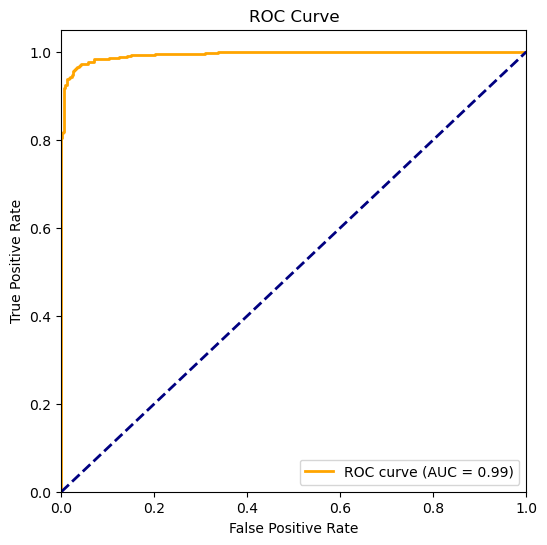

Accuracy_with_vector_size_1000_window_1000_min_count_3_kernel_rbf: 0.9644194756554307
Classification Report_with_vector_size_1000_window_1000_min_count_3_kernel_rbf:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       619
           1       0.97      0.97      0.97       983

    accuracy                           0.96      1602
   macro avg       0.96      0.96      0.96      1602
weighted avg       0.96      0.96      0.96      1602



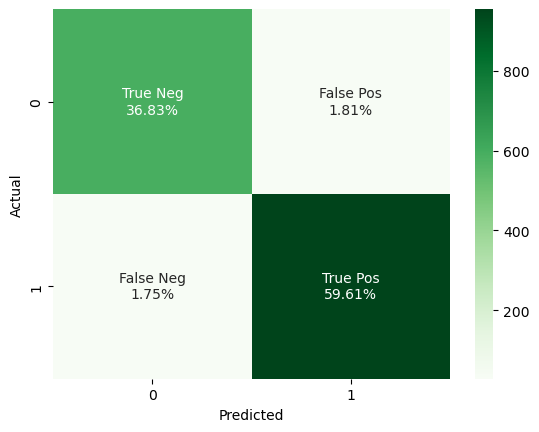

In [30]:
WordToVec(vector_size =1000,window=1000,min_count=3,kernel= "rbf")

# By using Word2Vec and performing tunning by changing the basic parameters of the package WordToVec. After tunning the model we have observed some following accuracies

1. For parameters with vector_size =1000,window=10,min_count=2,kernel= sigmoid. The accuracy is 71.7%

2. For parameters with vector_size =100,window=5,min_count=1,kernel= linear. The accuracy is 91.5%

3. For parameters with vector_size =1000,window=1000,min_count=2,kernel= linear. The accuracy is 94.5%

4. For parameters with vector_size =1000,window=100,min_count=2,kernel= rbf. The accuracy is 96.1%

5. For parameters with vector_size =1000,window=1000,min_count=3,kernel= rbf. The accuracy is 96.4%